# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [1]:
import pandas as pd
import requests
import google.generativeai as palm

In [2]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [3]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv

--2025-11-19 23:30:17--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv [following]
--2025-11-19 23:30:17--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_disney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10377469 (9.9M) [text/plain]
Saving to: ‘instagram_disney.csv’

instagram_disney.cs 100%[===================>]   9

In [4]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")


In [5]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,videoDuration,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,59.179,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/disneylat/,3378657362149709028,disneylat,https://www.instagram.com/p/C7jZvhQsRTk/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,115.115,disneyprincesala,Original audio,True,False,NaN,9.840821e+14,"[{'full_name': 'Disney', 'id': '2957422264', '...","[{'id': '2957422264', 'is_verified': True, 'pr...",NaN
196,https://www.instagram.com/disneylat/,3333366985910424893,disneylat,https://www.instagram.com/p/C5Cf5zdNJU9/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/disneylat/,3331639585011555501,disneylat,https://www.instagram.com/p/C48XI0APlyt/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,https://www.instagram.com/disneylat/,3329464423368675903,disneylat,https://www.instagram.com/p/C40okC3MNI_/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


¿Cuántos posts hay en total?
200



In [6]:
df.shape

(200, 58)

¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan? (mira la columna type)
Video	41.5
Sidecar	33.5
Image	25.0


In [7]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'externalUrls', 'followersCount', 'followsCount', 'hasChannel',
       'highlightReelCount', 'isBusinessAccount', 'joinedRecently',
       'businessCategoryName', 'private', 'verified', 'profilePicUrl',
       'profilePicUrlHD', 'igtvVideoCount', 'relatedProfiles',
       'latestIgtvVideos', 'postsCount', 'fbid', 'type', 'shortCode',
       'caption', 'hashtags', 'mentions', 'commentsCount', 'firstComment',
       'latestComments', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl',
       'images', 'alt', 'likesCount', 'timestamp', 'childPosts',
       'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored',
       'isCommentsDisabled', 'videoUrl', 'videoViewCount', 'videoPlayCount',
       'productType', 'videoDuration', 'musicInfo.artist_name',
       'musicInfo.song_name', 'musicInfo.uses_original_audio',
       'musicInfo.should_mute_audio', 'musicInfo.should_mute_audio_reason',
       'musicInfo.audio

In [24]:
df['type'].value_counts()
df['type'].value_counts(normalize=True) * 100

,proportion
type,
Video,41.5
Sidecar,33.5
Image,25.0


¿Cuál es el rango de fechas cubierto por los posts?

In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

inicio = df['timestamp'].min()
fin = df['timestamp'].max()

inicio, fin

(Timestamp('2024-03-16 17:00:01+0000', tz='UTC'),
 Timestamp('2025-05-20 21:00:01+0000', tz='UTC'))

In [9]:
df['timestamp'].min()

'2024-03-16T17:00:01.000Z'

¿Qué post obtuvo más 'likes' y cuál crees que es la razón? Es un contenido entretenido y divertido, Disney suele tener más engagement con contenido de nostalgia (Ralph, Princesas, Mickey) o humor y conecta con la audiencia. Tambien influye la fecha y hora ya que DisneyLat suele publicar en horarios de mayor actividad (6 p.m y 9 p.m. LATAM)
Tambien si el post tenía hashtags o menciones, puede haber aumentado el alcance.

In [30]:
top_like = df.loc[df['likesCount'].idxmax()]
top_like

,85
inputUrl,https://www.instagram.com/disneylat/
id,3506371026641991220
username,disneylat
url,https://www.instagram.com/p/DCpId8Ft7Y0/
fullName,Disney
biography,La cuenta oficial de Disney para Latinoamérica.
externalUrls,[]
followersCount,569613
followsCount,36
hasChannel,False


In [31]:
df['likesCount'].max()

558944


## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

Explica por qué es importante limpiar y normalizar el texto de los captions. Los captions tienen URLs, emojis, menciones, hashtags y signos innecesarios. Estos elementos no aportan significado al análisis y pueden distorsionar las métricas por eso debemos hacer limpieza de datos, reduciendo asi el ruido de datos, permite comparar, mejora el analisis de frecuencia de las palabras

In [73]:
import re, nltk, string
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_caption(text):
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@[\w_]+", " ", text)
    text = re.sub(r"[#]", " ", text)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['caption_clean'] = df['caption'].fillna("").apply(clean_caption)
df[['caption', 'caption_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,caption,caption_clean
0,"En cada imagen se esconde un Mickey, ¿puedes e...",en cada imagen se esconde un mickey ¿puedes en...
1,Esto se va a descontrolar.,esto se va a descontrolar
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,los 2000 hechos canción vuelve a ver lizziemcg...
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,con ser ella misma alcanzaba 🥹 mulán disponibl...
4,"Llevábamos años esperando este momento, y no d...",llevábamos años esperando este momento y no de...


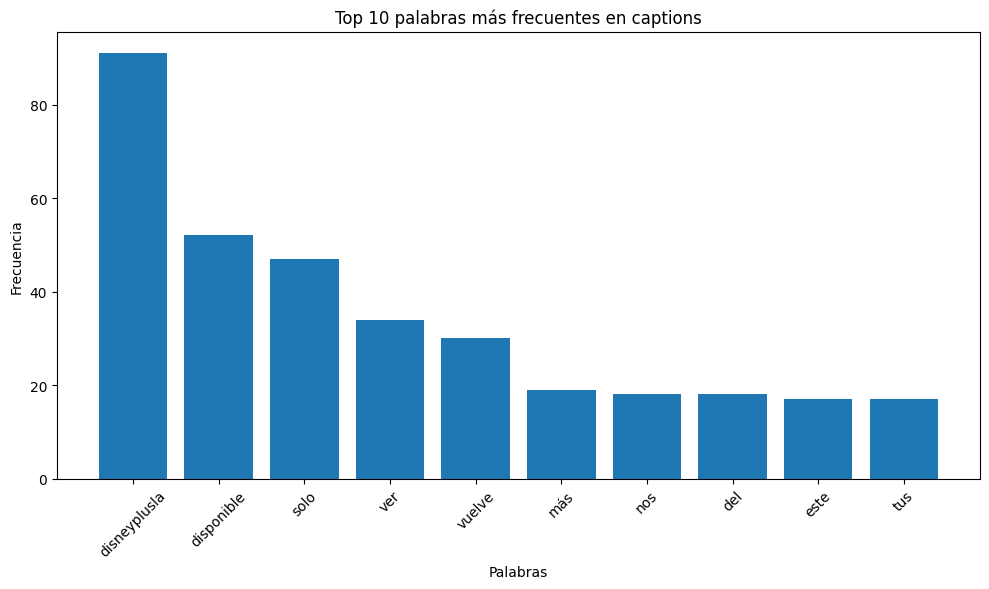

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re


df = pd.read_csv("instagram_disney.csv")
text = " ".join(df["caption"].astype(str).tolist()).lower()

text_clean = re.sub(r"[^a-zA-ZñÑáéíóúÁÉÍÓÚ ]", " ", text)


words = text_clean.split()

# Palabras comunes que queremos excluir (stopwords)
stopwords = {
    "the","and","a","of","to","in","for","is","on","with","at","by","from",
    "que","de","la","el","los","las","y","en","un","una","por","para","con",
}


filtered_words = [w for w in words if w not in stopwords and len(w) > 2]


word_counts = Counter(filtered_words)

top_words = word_counts.most_common(10)


labels = [w[0] for w in top_words]
values = [w[1] for w in top_words]

# Graficar
plt.figure(figsize=(10,6))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top 10 palabras más frecuentes en captions")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()



## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [39]:
# Clasifica el siguiente caption en uno de estos temas: "Magia", "Personajes", "Celebración".
# Responde únicamente con una palabra: el nombre del tema.
# Caption:

In [40]:
!pip install openai pandas matplotlib seaborn

import pandas as pd
from openai import OpenAI
client = OpenAI()

df = pd.read_csv("instagram_disney.csv")

def clasificar_tema(caption):
    prompt = f"""
    Clasifica el siguiente caption en uno de estos temas: Magia, Personajes, Celebración.
    Responde únicamente con una palabra: el nombre del tema.
    Caption: {caption}
    """
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role":"user","content":prompt}],
        max_tokens=1
    )
    return response.choices[0].message.content.strip()

df["topics"] = df["caption"].astype(str).apply(clasificar_tema)

df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,topics
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Person
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Celebr
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,sacqspot,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN,Celebr
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Person
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Celebr


In [41]:
df["topics"].value_counts()

,count
topics,
Celebr,94
Person,84
Mag,22


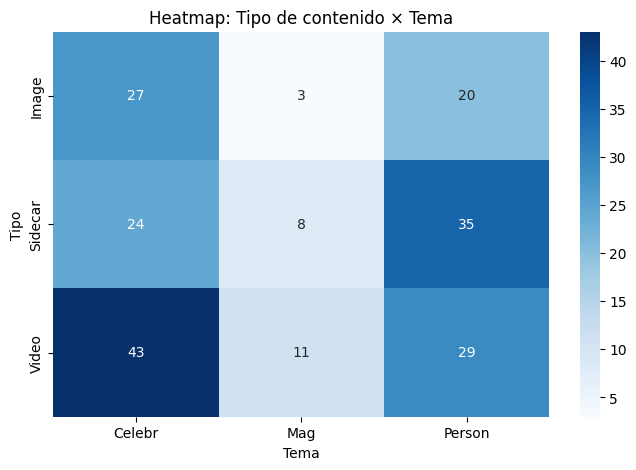

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

tabla = pd.crosstab(df["type"], df["topics"])

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: Tipo de contenido × Tema")
plt.ylabel("Tipo")
plt.xlabel("Tema")
plt.show()

In [49]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv")

# Palabras clave por tema
themes = {
    "Magia": ["mágico", "magia", "mágica", "encanto", "fantasía", "sueños"],
    "Personajes": ["mickey", "minnie", "donald", "buzz", "woody", "princesa", "personaje"],
    "Celebración": ["feliz", "celebra", "navidad", "cumpleaños", "fiesta", "celebración", "aniversario"]
}

def classify_caption(caption):
    caption = str(caption).lower()

    for theme, keywords in themes.items():
        if any(word in caption for word in keywords):
            return theme

    return "Magia"   # por defecto, Disney siempre comunica magia

df["topics"] = df["caption"].apply(classify_caption)

df[["caption", "topics"]].head()


,caption,topics
0,"En cada imagen se esconde un Mickey, ¿puedes e...",Personajes
1,Esto se va a descontrolar.,Magia
2,Los 2000 hechos canción. \n\nVuelve a ver #Liz...,Magia
3,Con ser ella misma alcanzaba 🥹\n\n#Mulán dispo...,Magia
4,"Llevábamos años esperando este momento, y no d...",Magia


In [50]:
df["topics"].value_counts()


,count
topics,
Magia,160
Personajes,24
Celebración,16


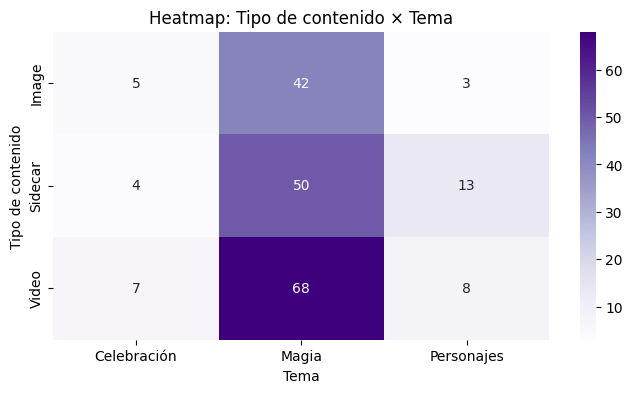

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

cross = pd.crosstab(df["type"], df["topics"])

plt.figure(figsize=(8,4))
sns.heatmap(cross, annot=True, fmt="d", cmap="Purples")
plt.title("Heatmap: Tipo de contenido × Tema")
plt.xlabel("Tema")
plt.ylabel("Tipo de contenido")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Temas encontrados en la base:
topics
otro           129
personajes      30
magia           21
celebracion     20
Name: count, dtype: int64


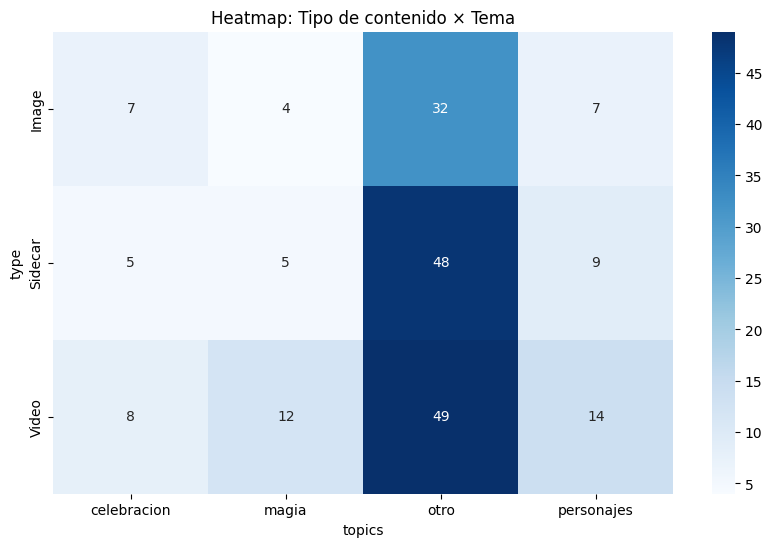


Tema dominante: otro

Insights:
1. El contenido no cae en los temas previstos; revisar la estrategia.
2. Evaluar nuevos clusters o ampliar palabras clave.


In [71]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


df = pd.read_csv("/content/instagram_disney.csv")
def clean_caption(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@[\w_]+", " ", text)
    text = re.sub(r"[#]", " ", text)
    text = re.sub(r"[{}]".format(string.punctuation), " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["caption_clean"] = df["caption"].fillna("").apply(clean_caption)


temas = {
    "magia": ["magia", "mágico", "fantasía", "encanto", "mundo"],
    "personajes": ["mickey", "minnie", "elsa", "ana", "ralph", "marvel", "personaje"],
    "celebracion": ["feliz", "cumple", "celebra", "navidad", "evento", "fiesta"]
}

def clasificar_tema(texto):
    texto = str(texto).lower()
    for tema, palabras in temas.items():
        if any(p in texto for p in palabras):
            return tema
    return "otro"

df["topics"] = df["caption_clean"].apply(clasificar_tema)

print("Temas encontrados en la base:")
print(df["topics"].value_counts())


tabla = pd.crosstab(df["type"], df["topics"])

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, cmap="Blues")
plt.title("Heatmap: Tipo de contenido × Tema")
plt.show()


tema_dominante = df["topics"].value_counts().idxmax()
print("\nTema dominante:", tema_dominante)


if tema_dominante == "magia":
    print("\nInsights:")
    print("1. La audiencia responde bien a contenido aspiracional y mágico; usar más storytelling visual.")
    print("2. Incluir frases o escenas que evoquen nostalgia y fantasía aumenta la interacción.")
elif tema_dominante == "personajes":
    print("\nInsights:")
    print("1. Los personajes son motores de engagement; usar más apariciones de rostros reconocibles.")
    print("2. Combine personajes clásicos con lanzamientos nuevos para ampliar alcance.")
elif tema_dominante == "celebracion":
    print("\nInsights:")
    print("1. Las fechas especiales generan picos de engagement: planear un calendario fijo anual.")
    print("2. Usar CTAs de participación ('cuéntanos cómo celebras...') incrementa comentarios.")
else:
    print("\nInsights:")
    print("1. El contenido no cae en los temas previstos; revisar la estrategia.")
    print("2. Evaluar nuevos clusters o ampliar palabras clave.")




## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [70]:
import pandas as pd

df = pd.read_csv("instagram_disney.csv") # Corrected filename

df["texto_normalizado"] = df["caption"].astype(str).str.lower() # Changed 'texto' to 'caption'

def clasificar_campaña(texto):
    if "magia" in texto:
        return "Magia"
    elif "personajes" in texto:
        return "Personajes"
    elif "celebración" in texto or "celebracion" in texto:
        return "Celebración"
    else:
        return "Otro"

df["campaña"] = df["texto_normalizado"].apply(clasificar_campaña)

df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,followersCount,followsCount,hasChannel,...,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,isPinned,texto_normalizado,campaña
0,https://www.instagram.com/disneylat/,3626608212947059675,disneylat,https://www.instagram.com/p/DJUTPSAOUPb/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en cada imagen se esconde un mickey, ¿puedes e...",Otro
1,https://www.instagram.com/disneylat/,3636752063146304692,disneylat,https://www.instagram.com/p/DJ4VrusASS0/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,esto se va a descontrolar.,Otro
2,https://www.instagram.com/disneylat/,3629059382491345626,disneylat,https://www.instagram.com/p/DJdAkfiMfLa/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,Original audio,True,False,NaN,6.053466e+14,NaN,NaN,NaN,los 2000 hechos canción. \n\nvuelve a ver #liz...,Otro
3,https://www.instagram.com/disneylat/,3624961017727223603,disneylat,https://www.instagram.com/p/DJOctb6RQcz/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,con ser ella misma alcanzaba 🥹\n\n#mulán dispo...,Otro
4,https://www.instagram.com/disneylat/,3634637246638652679,disneylat,https://www.instagram.com/p/DJw01GVTP0H/,Disney,La cuenta oficial de Disney para Latinoamérica.,[],569613,36,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"llevábamos años esperando este momento, y no d...",Otro
